In [2]:
import numpy as np

In [3]:
def is_hot(grados):
    if 33 < grados <= 40: # Equivalente a grados>33 and grados<=40
        return True
    else:
        return False

def is_hot(grados):
    return 33 < grados <= 40

In [4]:
sudoku = np.array([[5,3,0,0,7,0,0,0,0],
                   [6,0,0,1,9,5,0,0,0],
                   [1,9,8,0,0,0,0,6,0],
                   [8,0,0,0,6,0,0,0,3],
                   [4,0,0,8,0,3,0,0,1],
                   [7,0,0,0,2,0,0,0,6],
                   [0,6,0,0,0,0,2,8,0],
                   [3,8,0,4,1,9,7,2,5],
                   [4,0,0,0,8,0,0,7,9]])

ceros_por_fila = np.count_nonzero(sudoku == 0, axis=1) # [0,0,1,1,0,1,1,1,1] [0,1,1,0,0,0,1,1,1] Es un true o false los cuenta por, entonces cuenta los que no son 0 y lo vuelve numero y arroja un numero por fila en forma de vector
ceros_por_col = np.count_nonzero(sudoku == 0, axis=0)

print(ceros_por_fila, ceros_por_col)

[6 5 5 6 5 6 6 1 5] [1 5 8 6 3 6 7 5 4]


In [ ]:
#FUNCIONES DE ESTADISTICA

In [5]:
np.random.seed(2022)
temperatures= np.random.normal(loc=17,scale=20,size=1000000)


# https://numpy.org/doc/stable/reference/routines.statistics.html

print(temperatures.mean())
print(np.histogram(temperatures))

17.001888200806267
(array([     4,    425,   9761,  86584, 290984, 379850, 192169,  37354,
         2789,     80]), array([-90.26009195, -69.94754344, -49.63499494, -29.32244643,
        -9.00989792,  11.30265058,  31.61519909,  51.9277476 ,
        72.2402961 ,  92.55284461, 112.86539312]))


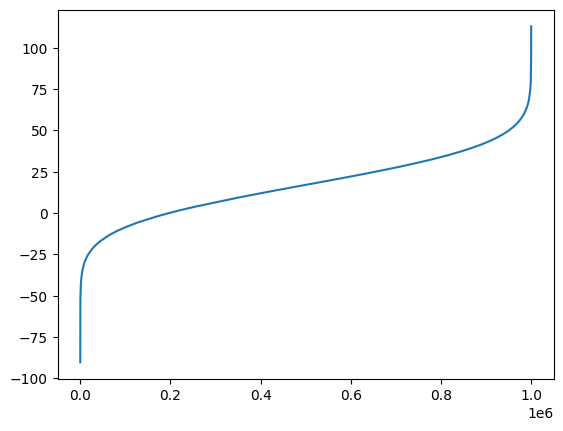

In [7]:
import matplotlib.pyplot as plot

fig, ax = plot.subplots()
ax.plot(np.sort(temperatures))

In [8]:
np.quantile(temperatures,0.5) 

np.float64(17.030287339736915)

In [12]:
np.percentile(temperatures,90) 

np.float64(42.57763438240019)

In [13]:
hist, bin_edges = np.histogram(temperatures)
print(hist)
print(bin_edges)

print(np.sum(hist))

[     4    425   9761  86584 290984 379850 192169  37354   2789     80]
[-90.26009195 -69.94754344 -49.63499494 -29.32244643  -9.00989792
  11.30265058  31.61519909  51.9277476   72.2402961   92.55284461
 112.86539312]
1000000


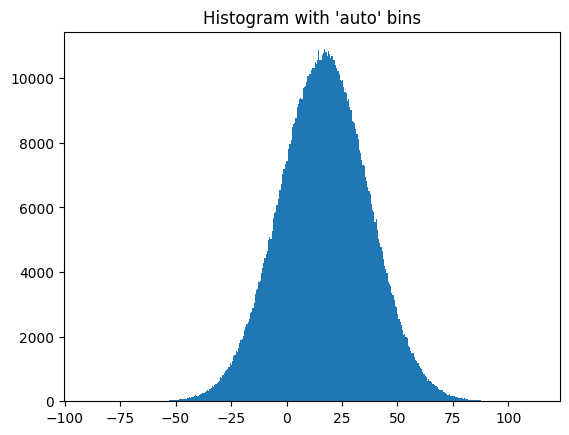

In [14]:
import matplotlib.pyplot as plt
_ = plt.hist(temperatures, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [18]:
space = np.linspace(0,1,len(temperatures))
print(space[:10])

[0.000000e+00 1.000001e-06 2.000002e-06 3.000003e-06 4.000004e-06
 5.000005e-06 6.000006e-06 7.000007e-06 8.000008e-06 9.000009e-06]


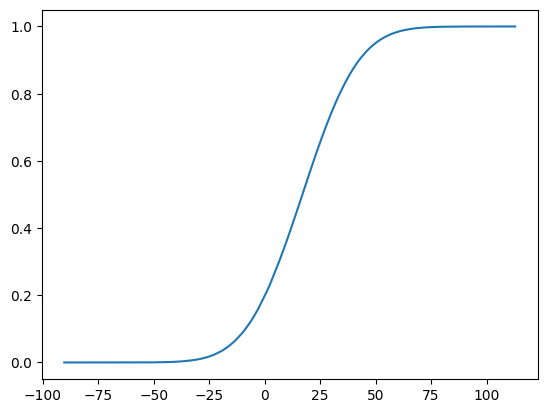

In [19]:
import matplotlib.pylab as plt

temperatures_sorted = np.sort(temperatures)
fig, ax = plt.subplots()
ax.plot(temperatures_sorted,space)
#CDF?

In [ ]:
#Gestion de alertas y errores

In [20]:
a , b = 0, 3
c = b/a

ZeroDivisionError: division by zero

In [21]:
a , b = 0, 3
try:
    c = b/a
except:
    print("error")
finally:
    print("Intento realizar una linea alternativa de ejecucion")

print("Esto sigue")

error
Intento realizar una linea alternativa de ejecucion
Esto sigue


In [25]:
a , b = 0, 3
try:
    c = b/a
except:
    print(f"Error divisiòn entre :{b} / {a} =0")
finally:
    print("Intento realizar una linea alternativa de ejecucion")

print("Esto sigue")

Error divisiòn entre :3 / 0 =0
Intento realizar una linea alternativa de ejecucion
Esto sigue


In [22]:
a , b = 0, 3
try:
    c = b/a
except ZeroDivisionError:
    print("Error")
finally:
    print("Intento realizar una linea alternativa de ejecución")

Error
Intento realizar una linea alternativa de ejecución


In [23]:
a , b = 0, 3
d={"a":0,"b":-1}
try:
    print(d["c"])
except ZeroDivisionError:
    print("error")
finally:
    print("Intento realizar una linea alternativa de ejecucion")

Intento realizar una linea alternativa de ejecucion


KeyError: 'c'

In [26]:
a , b = 0, 3
d={"a":0,"b":-1}
try:
    print(d["c"])
except ZeroDivisionError:
    print("hay un cero")
except KeyError:
    print("Key no existente")
finally:
    print("Intento realizar una linea alternativa de ejecucion")

Key no existente
Intento realizar una linea alternativa de ejecucion


In [ ]:
#Reflexiones sobre el rendimiento

In [31]:
# para saber el rendimiento en tiempo de un programa
import numpy as np
import time
serie = np.random.random(10000000)

start = time.time()
b = []
for value in serie:
    try:
        b.append(math.sqrt(value))
    except:
        b.append(0)
end1 = time.time()-start
print("Response time: %s seconds"%(end1))

Response time: 7.259323835372925 seconds


In [32]:
start = time.time()
b = np.sqrt(serie)
end2 = time.time()-start
print("Response time: %s seconds"%(end2))

Response time: 0.05647921562194824 seconds


In [33]:
speedup = end1/end2
print(speedup)
print("El programa 2 es %0.2f veces más rápido que el programa 1"%speedup)

128.53088973409712
El programa 2 es 128.53 veces más rápido que el programa 1


In [ ]:
! uv pip

In [34]:
#para que un programa se ejecute mas rapido
from numba import njit
import random


def monte_carlo_pi_sinParalelizar(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

@njit
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

ModuleNotFoundError: No module named 'numba'

In [35]:
!uv pip install pandas

Resolved 6 packages in 552ms
Prepared 2 packages in 3.50s
Installed 2 packages in 937ms
 + pandas==2.3.3
 + pytz==2025.2


In [37]:
import pandas as pd
import pandas
from pandas import *

In [43]:
df = pd.read_csv("WHO.csv")
df

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
0,Afghanistan,1,1,151.0,28.0,NaN,NaN,NaN,26088.0,4.0,...,692.50,NaN,NaN,NaN,257.00,231.9,257.00,5740436.0,5.44,22.9
1,Albania,2,2,27.0,98.7,6000.0,93.0,94.0,3172.0,0.6,...,3499.12,4.790000e+09,78.14,-2.040000e+09,18.47,15.5,18.47,1431793.9,2.21,45.4
2,Algeria,3,3,6.0,69.9,5940.0,94.0,96.0,33351.0,1.5,...,137535.56,6.970000e+10,351.36,4.700000e+09,40.00,31.2,40.00,20800000.0,2.61,63.3
3,Andorra,4,2,NaN,NaN,NaN,83.0,83.0,74.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,5,3,146.0,67.4,3890.0,49.0,51.0,16557.0,2.8,...,8991.46,1.490000e+10,27.13,9.140000e+09,164.10,242.5,164.10,8578749.0,4.14,53.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Vietnam,198,6,25.0,90.3,2310.0,91.0,96.0,86206.0,1.4,...,101826.23,4.480000e+10,47.11,-1.940000e+09,20.20,23.4,20.20,21900000.0,2.90,26.4
198,West Bank and Gaza,199,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,655.86,3.780000e+09,NaN,NaN,28.00,25.8,28.00,2596216.0,3.33,71.6
199,Yemen,200,1,83.0,54.1,2090.0,65.0,85.0,21732.0,3.0,...,20148.34,1.150000e+10,114.52,8.310000e+08,82.40,87.9,82.40,5759120.5,4.37,27.3
200,Zambia,201,3,161.0,68.0,1140.0,94.0,90.0,11696.0,1.9,...,2366.94,4.090000e+09,10.41,-4.470000e+08,175.30,163.8,175.30,4017411.0,1.95,35.0


In [44]:
df.shape #solo filas y columnas, no puede haber mas de dos dimensiones como en NUMPY, es una tabla

(202, 358)

In [45]:
df.columns #

Index(['Country', 'CountryID', 'Continent', 'Adolescent fertility rate (%)',
       'Adult literacy rate (%)',
       'Gross national income per capita (PPP international $)',
       'Net primary school enrolment ratio female (%)',
       'Net primary school enrolment ratio male (%)',
       'Population (in thousands) total', 'Population annual growth rate (%)',
       ...
       'Total_CO2_emissions', 'Total_income', 'Total_reserves',
       'Trade_balance_goods_and_services', 'Under_five_mortality_from_CME',
       'Under_five_mortality_from_IHME', 'Under_five_mortality_rate',
       'Urban_population', 'Urban_population_growth',
       'Urban_population_pct_of_total'],
      dtype='object', length=358)

In [46]:
df.index

RangeIndex(start=0, stop=202, step=1)

In [47]:
df.columns[:5]

Index(['Country', 'CountryID', 'Continent', 'Adolescent fertility rate (%)',
       'Adult literacy rate (%)'],
      dtype='object')

In [48]:
df.columns[-2]

'Urban_population_growth'

In [49]:
df.columns[0:5]

Index(['Country', 'CountryID', 'Continent', 'Adolescent fertility rate (%)',
       'Adult literacy rate (%)'],
      dtype='object')

In [50]:
df.columns[-5:-1]

Index(['Under_five_mortality_from_IHME', 'Under_five_mortality_rate',
       'Urban_population', 'Urban_population_growth'],
      dtype='object')

In [54]:
df.columns[10] # como se que dice la columna 10

'Population in urban areas (%)'

In [55]:
df.describe() #las diferencias son los NaN

,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),Population in urban areas (%),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
count,202.000000,202.000000,177.000000,131.000000,178.000000,179.000000,179.000000,1.930000e+02,193.000000,193.000000,...,1.860000e+02,1.780000e+02,128.000000,1.710000e+02,181.000000,170.000000,181.000000,1.880000e+02,188.000000,188.000000
mean,101.500000,3.579208,59.457627,78.871756,11250.112360,84.033520,85.698324,3.409805e+04,1.297927,54.911917,...,1.483596e+05,2.015567e+11,57.253516,3.424012e+08,56.677624,54.356471,56.677624,1.665763e+07,2.165851,55.195213
std,58.456537,1.808263,49.105286,20.415760,12586.753417,17.788047,15.451212,1.304957e+05,1.163864,23.554182,...,6.133091e+05,9.400689e+11,138.669298,5.943043e+10,60.060929,61.160556,60.060929,5.094867e+07,1.596628,23.742122
min,1.000000,1.000000,0.000000,23.600000,260.000000,6.000000,11.000000,2.000000e+00,-2.500000,10.000000,...,2.565000e+01,5.190000e+07,0.990000,-7.140000e+11,2.900000,3.000000,2.900000,1.545600e+04,-1.160000,10.000000
25%,51.250000,2.000000,19.000000,68.400000,2112.500000,79.000000,79.500000,1.340000e+03,0.500000,36.000000,...,1.672615e+03,3.317500e+09,16.292500,-1.210000e+09,12.400000,8.475000,12.400000,9.171623e+05,1.105000,35.650000
50%,101.500000,3.000000,46.000000,86.500000,6175.000000,90.000000,90.000000,6.762000e+03,1.300000,57.000000,...,1.021157e+04,1.145000e+10,28.515000,-2.240000e+08,29.980000,27.600000,29.980000,3.427661e+06,1.945000,57.300000
75%,151.750000,5.000000,91.000000,95.300000,14502.500000,96.000000,96.000000,2.173200e+04,2.100000,73.000000,...,6.549217e+04,8.680000e+10,55.310000,1.024000e+09,88.700000,82.900000,88.700000,9.837113e+06,3.252500,72.750000
max,202.000000,7.000000,199.000000,99.800000,60870.000000,100.000000,100.000000,1.328474e+06,4.300000,100.000000,...,5.776432e+06,1.100000e+13,1334.860000,1.390000e+11,267.000000,253.700000,267.000000,5.270000e+08,7.850000,100.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Columns: 358 entries, Country to Urban_population_pct_of_total
dtypes: float64(355), int64(2), object(1)
memory usage: 565.1+ KB


In [58]:
df.head(2) #pido dos primeras


,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
0,Afghanistan,1,1,151.0,28.0,NaN,NaN,NaN,26088.0,4.0,...,692.50,NaN,NaN,NaN,257.00,231.9,257.00,5740436.0,5.44,22.9
1,Albania,2,2,27.0,98.7,6000.0,93.0,94.0,3172.0,0.6,...,3499.12,4.790000e+09,78.14,-2.040000e+09,18.47,15.5,18.47,1431793.9,2.21,45.4


In [59]:
df.tail(2) #pido dos ultimas

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
200,Zambia,201,3,161.0,68.0,1140.0,94.0,90.0,11696.0,1.9,...,2366.94,4.090000e+09,10.41,-447000000.0,175.3,163.8,175.3,4017411.0,1.95,35.0
201,Zimbabwe,202,3,101.0,89.5,NaN,88.0,87.0,13228.0,0.8,...,11457.33,5.620000e+09,3.39,-171000000.0,106.5,67.0,106.5,4709965.0,1.90,35.9


In [65]:
df_gastos = pd.read_csv("l01480209-presupuesto-de-gastos-del-ayuntamiento-de-bilbao-de-2023.csv",encoding="cp1250",sep=";") # quins errors genera ?

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 59: character maps to <undefined>

In [1]:
df_gastos

NameError: name 'df_gastos' is not defined

In [66]:
df = pd.read_csv("Speculation_Watch_List_20251104.csv")
df

,borough,boro,block,lot,bbl,hnum_lo,hnum_hi,str_name,crfn,grantee,...,yearqtr,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract (2020) (from 2023),BIN,NEIGHBORHOOD TABULATION AREA (NTA) (2020) (from 2023),Location1
0,MN,1,2180,505,1021800505,4441,4443,BROADWAY,2023000150044,GETTY INDUSTRIES LLC,...,2023Q2,10040.0,40.856888,-73.932552,112.0,10.0,279.0,1064465.0,MN1202,POINT (-73.932552 40.856888)
1,BK,3,2443,23,3024430023,364,364,BEDFORD AVENUE,2021000295453,SOUTH 4 HOLDINGS LLC,...,2021Q3,11249.0,40.711804,-73.963016,301.0,34.0,549.0,3063429.0,North Side-South Side,POINT (-73.963016 40.711804)
2,BK,3,5840,13,3058400013,6647,6647,BERGEN PLACE,2021000172576,6647 BERGEN PLACE MANAGEMENT LLC,...,2021Q2,11220.0,40.639542,-74.028058,310.0,43.0,30.0,3144313.0,Bay Ridge,POINT (-74.028058 40.639542)
3,MN,1,495,31,1004950031,239,239,MULBERRY STREET,2022000162370,"OR 239 MULBERRY, LLC",...,2022Q2,10012.0,40.722778,-73.995949,102.0,1.0,43.0,1077747.0,SoHo-TriBeCa-Civic Center-Little Italy,POINT (-73.995949 40.722778)
4,BX,2,3982,1,2039820001,2501,2509,TRATMAN AVENUE,2022000208808,TRATMAN GARDENS LLC,...,2022Q2,10461.0,40.839309,-73.845389,210.0,13.0,200.0,2092992.0,Van Nest-Morris Park-Westchester Square,POINT (-73.845389 40.839309)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,QN,4,879,15,4008790015,21-45,21-45,23 STREET,2024000097300,21-45 23RD STREET LLC,...,2024Q2,11105.0,40.780573,-73.914796,401.0,22.0,103.0,4019567.0,QN0101,POINT (-73.914796 40.780573)
655,BX,2,4435,41,2044350041,2525,2525,WALLACE AVENUE,2024000151250,2525 WALLACE CORP.,...,2024Q2,10467.0,40.864291,-73.864507,211.0,13.0,330.0,2051396.0,BX1104,POINT (-73.864507 40.864291)
656,BX,2,2852,14,2028520014,12,16,EAST 177 STREET,2024000100758,FRESB 2017-SB30 12-16 EAST 177TH STREET,...,2024Q2,10453.0,40.850069,-73.910058,205.0,14.0,23301.0,2092059.0,BX0502,POINT (-73.910058 40.850069)
657,MN,1,837,12,1008370012,55,55,WEST 35 STREET,2024000143227,51-55 WEST 35TH STREET REALTY INC.,...,2024Q2,10001.0,40.749898,-73.985950,105.0,4.0,84.0,1085001.0,MN0502,POINT (-73.98595 40.749898)


In [67]:
df = pd.read_csv("tin00171_page_linear_2_0.csv")
df

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,freq,Time frequency,c_resid,Country of residence,unit,Unit of measure,nace_r2,...,geo,Geopolitical entity (reporting),TIME_PERIOD,Time,OBS_VALUE,Observation value,OBS_FLAG,Observation status (Flag) V2 structure,CONF_STATUS,Confidentiality status (flag)
0,dataflow,ESTAT:TIN00171(1.0),Nights spent at tourist accommodation establis...,M,Monthly,DOM,Domestic country,NR,Number,I551-I553,...,AL,Albania,2024-09,NaN,271802,NaN,NaN,NaN,NaN,NaN
1,dataflow,ESTAT:TIN00171(1.0),Nights spent at tourist accommodation establis...,M,Monthly,DOM,Domestic country,NR,Number,I551-I553,...,AL,Albania,2024-10,NaN,144879,NaN,NaN,NaN,NaN,NaN
2,dataflow,ESTAT:TIN00171(1.0),Nights spent at tourist accommodation establis...,M,Monthly,DOM,Domestic country,NR,Number,I551-I553,...,AL,Albania,2024-11,NaN,87044,NaN,NaN,NaN,NaN,NaN
3,dataflow,ESTAT:TIN00171(1.0),Nights spent at tourist accommodation establis...,M,Monthly,DOM,Domestic country,NR,Number,I551-I553,...,AL,Albania,2024-12,NaN,103310,NaN,NaN,NaN,NaN,NaN
4,dataflow,ESTAT:TIN00171(1.0),Nights spent at tourist accommodation establis...,M,Monthly,DOM,Domestic country,NR,Number,I551-I553,...,AL,Albania,2025-01,NaN,89172,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,dataflow,ESTAT:TIN00171(1.0),Nights spent at tourist accommodation establis...,M,Monthly,DOM,Domestic country,NR,Number,I551-I553,...,XK,Kosovo*,2025-04,NaN,64268,NaN,NaN,NaN,NaN,NaN
448,dataflow,ESTAT:TIN00171(1.0),Nights spent at tourist accommodation establis...,M,Monthly,DOM,Domestic country,NR,Number,I551-I553,...,XK,Kosovo*,2025-05,NaN,72309,NaN,NaN,NaN,NaN,NaN
449,dataflow,ESTAT:TIN00171(1.0),Nights spent at tourist accommodation establis...,M,Monthly,DOM,Domestic country,NR,Number,I551-I553,...,XK,Kosovo*,2025-06,NaN,62529,NaN,NaN,NaN,NaN,NaN
450,dataflow,ESTAT:TIN00171(1.0),Nights spent at tourist accommodation establis...,M,Monthly,DOM,Domestic country,NR,Number,I551-I553,...,XK,Kosovo*,2025-07,NaN,60976,NaN,NaN,NaN,NaN,NaN
